In [2]:
# Lets load some libraries and car data and precalculated features
library(dplyr)
library(ggplot2)
library(tidyr)
library(corrplot)

load("data/fsecure.train.RData")


Warning message:
“package ‘dplyr’ was built under R version 3.3.2”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”Warning message:
“package ‘glmnet’ was built under R version 3.3.2”Loading required package: Matrix
Loading required package: foreach
Warning message:
“package ‘foreach’ was built under R version 3.3.2”Loaded glmnet 2.0-5



Warning message:
“package ‘tidyr’ was built under R version 3.3.2”
Attaching package: ‘tidyr’

The following object is masked from ‘package:Matrix’:

    expand



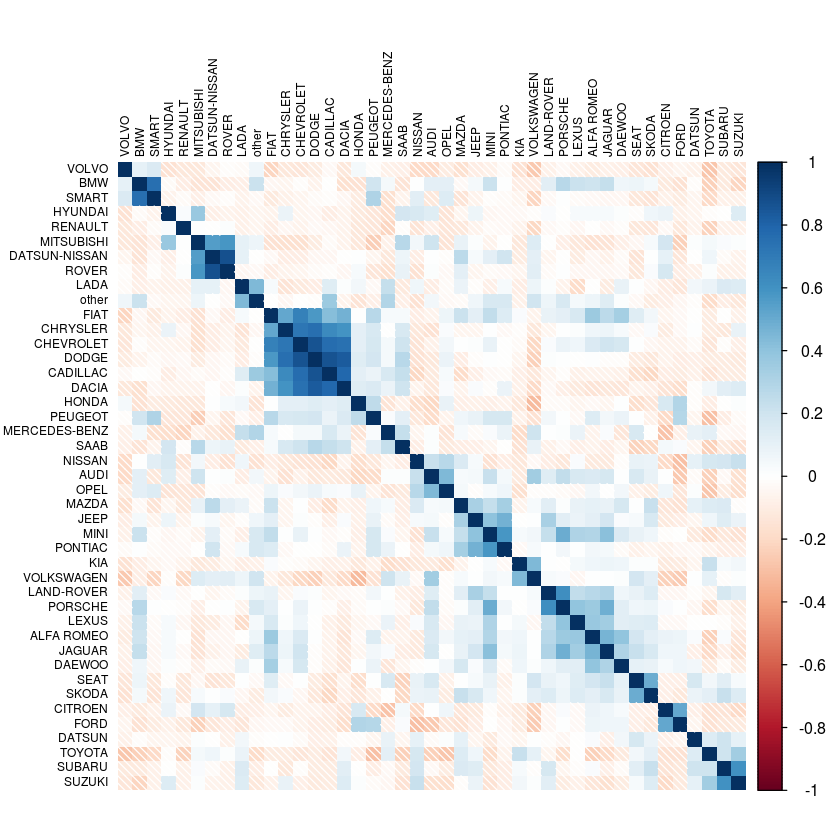

In [5]:

x<-
  autodata %>% filter(ryhma!="Matkailu") %>% 
  group_by(merkki) %>% 
  mutate(N.merkki=n()) %>% ungroup %>% 
  mutate(merkki=ifelse(N.merkki<1000,"other",merkki)) %>% 
  count(merkki, kuntanimi) %>% 
  spread(merkki, n, fill=0) 

x$N<-select(x,-kuntanimi) %>% rowSums
x<-mutate_at(x, vars(-kuntanimi,-N), funs(./N))

cor.matrix <- select(x,-kuntanimi,-N) %>% 
  cor(.,use="na.or.") 

corrplot(cor.matrix, order="hclust", 
         hclust.method="complete", 
         tl.cex=0.6,tl.col="black", 
         method="shade")